In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20192.L3/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
endpoint https://m3g87w9l3k.execute-api.us-west-2.amazonaws.com/dev/rlxmooc


## Objetivo del módulo

Conocer el uso de la estructura de árboles binarios para la ordenación de datos

## Preguntas

- ¿Cómo se puede mantener ordenado un árbol binario?
- ¿Qué ventajas tendría mantenerlo ordenado?
- ¿Qué resultados dan los distintos tipos de recorridos sobre el árbol?
- ¿Cómo podemos mantener un árbol binario balanceado?

### Observa la siguiente implementación

- usamos explícitamente estructuras para almacenar un hijoz izquierdo y uno derecho
- tenemos un algoritmo para insertar elementos garantizando un cierto orden
- los recorridos sobre dicho orden nos producen listas ordenadas
- la complejidad computacional de cada operación

In [0]:
import numpy as np

class BTNode:
    
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left  = None
        self.right = None
        if left is not None:
            self.add_left(left)
        if right is not None:
            self.add_right(right)
    
    def add_left(self, value):
        assert self.left is None, "node already has left child"
        self.left  = self.__class__(value) if not isinstance(value,self.__class__) else value
        return self
        
    def add_right(self, value):
        assert self.right is None, "node already has right child"
        self.right  = self.__class__(value) if not isinstance(value,self.__class__) else value
        return self
    
    def swap_children(self):
        tmp = self.left
        self.left = self.right
        self.right = self.left
        return self
    
    def insert_ordered(self, new_value):
        if new_value < self.value:
            if self.left is None:
                self.add_left(new_value)
            else:
                self.left.insert_ordered(new_value)
        else:
            if self.right is None:
                self.add_right(new_value)
            else:
                self.right.insert_ordered(new_value)
        return self
    
    def ird(self):
        if self.value==None:
            return []
        s1 = self.left.ird() if self.left is not None else []
        s2 = self.right.ird() if self.right is not None else []
        return s1+[self.value]+s2    
    
    def to_indented_string(self, level, prefix=""):
        s = (" "*2*level + prefix + str(self.value) + "\n") if self.value is not None else ""
        s += self.left.to_indented_string(level+1, prefix="L: ") if self.left is not None else ""
        s += self.right.to_indented_string(level+1, prefix="R: ") if self.right is not None else ""
        return s       

    def __repr__(self):
        return self.to_indented_string(0)
 
    @classmethod
    def from_list(cls, a_list):
        r = cls(a_list[0])
        for i in a_list[1:]:
            r.insert_ordered(i)
        return r
    
    @classmethod
    def sort_list(cls, a_list):
        r = cls.from_list(a_list)
        return np.r_[r.ird()]

### podemos crear un árbol con un orden arbitrario

In [3]:
k=BTNode(10)\
    .add_right(BTNode(20)\
           .add_left(BTNode(15)\
                .add_left(91))\
           .add_right(21))\
    .add_left(12)
k

10
  L: 12
  R: 20
    L: 15
      L: 91
    R: 21

In [4]:
k.ird()

[12, 10, 91, 15, 20, 21]

### podemos crear un árbol manteniendo la siguiente propiedad:

- para cualquier nodo, su hijo izquierdo es menor y su hizo derecho es mayor

In [5]:
k = BTNode(10).insert_ordered(2).insert_ordered(12).insert_ordered(1).insert_ordered(4)
k

10
  L: 2
    L: 1
    R: 4
  R: 12

In [6]:
k = BTNode.from_list([10,2,12,1,4])
k

10
  L: 2
    L: 1
    R: 4
  R: 12

de modo que al recorrerlo nos produce una lista ordenada

In [7]:
k.ird()

[1, 2, 4, 10, 12]

In [8]:
BTNode.sort_list([10,43,12,1,-20])

array([-20,   1,  10,  12,  43])

In [9]:
np.random.permutation(100)[:10]

array([23, 47, 42, 12, 28, 70, 84,  2, 92,  6])

In [10]:
for _ in range(10):
    l = np.random.permutation(100)[:10]
    print(l,"-->", end=' ')
    print(BTNode.sort_list(l))

[65 40 34 58 53 17 52 27 45 31] --> [17 27 31 34 40 45 52 53 58 65]
[ 5 91 60  3  4 92 17 38 74  2] --> [ 2  3  4  5 17 38 60 74 91 92]
[81 98 11 64 73 25 32 77 20 55] --> [11 20 25 32 55 64 73 77 81 98]
[13 65  4 78 60 98 10 29 27 43] --> [ 4 10 13 27 29 43 60 65 78 98]
[72 16 40 78  8 88  0 49 18 86] --> [ 0  8 16 18 40 49 72 78 86 88]
[67 38 74 91 48  8  9 39 34  7] --> [ 7  8  9 34 38 39 48 67 74 91]
[53 14 35 33 32 58  8 95 24 49] --> [ 8 14 24 32 33 35 49 53 58 95]
[77 12 22 68 72  2 33 58 35 37] --> [ 2 12 22 33 35 37 58 68 72 77]
[16 71 29 19 57 76 85 95 27  6] --> [ 6 16 19 27 29 57 71 76 85 95]
[67 90 99 21 81 33 94 39  8 76] --> [ 8 21 33 39 67 76 81 90 94 99]


observa que, en la lección anterior, **ordenábamos in situ** y ahora creamos una estructura nueva.

finalmente, medimos rendimiento

In [11]:
def experiment_insert_ordered(n):
    k = np.random.permutation(100*n)[:n]
    tree = BTNode(k[0])
    for i in k:
        tree.insert_ordered(i)
    return tree

def experiment_sort(n):
    k = np.random.permutation(100*n)[:n]
    BTNode.sort_list(k)

r_times_insert = []
r_times_ird = []
r_times_sort = []
n_list = np.arange(10,100,10)*100

print("running experiments")
for n in n_list:
    print (".", end=" ")
    t = %timeit -r 3 -n 3 -o -q experiment_insert_ordered(n)
    r_times_insert.append(t.best)

    k = experiment_insert_ordered(n)
    t = %timeit -r 3 -n 3 -o -q k.ird()
    r_times_ird.append(t.best)

    t = %timeit -r 3 -n 3 -o -q experiment_sort(n)
    r_times_sort.append(t.best)

running experiments
. . . . . . . . . 

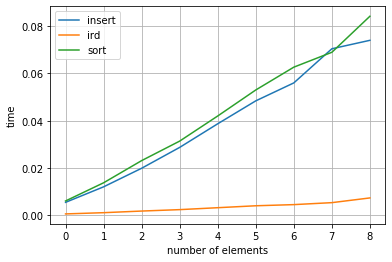

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r_times_insert, label="insert")
plt.plot(r_times_ird, label="ird")
plt.plot(r_times_sort, label="sort")
plt.ylabel("time")
plt.xlabel("number of elements")
plt.grid()
plt.legend()